In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

'2022 important GS.pdf'		       'ISTE Form SC(1).pdf'
'5_6116096758796781872 (1).pdf'        'ISTE LIFE TIME MEMBERS SHIP.pdf'
 5_6116096758796781872.pdf	       'ISTE .pdf'
'AO _ 7047.pdf'			       'Lucent book pdf.pdf'
'Colab Notebooks'		        moviessmall.zip
 Divefire			       'Paper Persontaion in KNPC .pdf'
 Faulty_solar_panel		        sample_physicaldmg
 IMG_6027.JPG			        Screenshot_20250127_181232.jpg
 IMG_6028.JPG			        solar_panel
 IMG_6029.JPG			        solar_panel_defect_model.h5
 IMG_6030.JPG			        TrackView
 IMG_6031.JPG			       'Untitled folder'
 IMG_6032.JPG			       'Untitled form (File responses)'
 instacart-market-basket-analysis.zip  'ydm 01.jpg'


In [ ]:
import os

data_dir = "/content/drive/My Drive/solar_panel"
print("Exists:", os.path.exists(data_dir))         # ✅ Should be True
print("Classes:", os.listdir(data_dir))            # ✅ Should list 6 folders


Exists: True
Classes: ['Snow-Covered-20250728T133227Z-1-001.zip', 'Physical-Damage-20250728T133326Z-1-001.zip', 'Electrical-damage-20250728T133343Z-1-001.zip', 'Clean-20250728T133357Z-1-001.zip', 'Bird-drop-20250728T133446Z-1-001.zip', 'Dusty-20250728T133613Z-1-001.zip', 'Bird-drop-20250728T133446Z-1-001', 'Clean-20250728T133357Z-1-001', 'Dusty-20250728T133613Z-1-001', 'Electrical-damage-20250728T133343Z-1-001', 'Physical-Damage-20250728T133326Z-1-001', 'Snow-Covered-20250728T133227Z-1-001']


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
import zipfile
import os

# All 6 zip file names
zip_files = [
    "Bird-drop-20250728T133446Z-1-001.zip",
    "Clean-20250728T133357Z-1-001.zip",
    "Dusty-20250728T133613Z-1-001.zip",
    "Electrical-damage-20250728T133343Z-1-001.zip",
    "Physical-Damage-20250728T133326Z-1-001.zip",
    "Snow-Covered-20250728T133227Z-1-001.zip"
]

drive_path = "/content/drive/My Drive/solar_panel"

for zip_name in zip_files:
    zip_path = os.path.join(drive_path, zip_name)
    extract_path = os.path.join(drive_path, zip_name.replace(".zip", ""))

    # ✅ Only unzip if not already done
    if not os.path.exists(extract_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"✅ Unzipped: {zip_name}")
    else:
        print(f"⚠️ Already unzipped: {zip_name}")


⚠️ Already unzipped: Bird-drop-20250728T133446Z-1-001.zip
⚠️ Already unzipped: Clean-20250728T133357Z-1-001.zip
⚠️ Already unzipped: Dusty-20250728T133613Z-1-001.zip
⚠️ Already unzipped: Electrical-damage-20250728T133343Z-1-001.zip
⚠️ Already unzipped: Physical-Damage-20250728T133326Z-1-001.zip
⚠️ Already unzipped: Snow-Covered-20250728T133227Z-1-001.zip


In [ ]:
#Step 1: Setup Paths & Libraries
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set data directory
data_dir = "/content/drive/My Drive/solar_panel"

# Image settings
img_height, img_width = 224, 224
batch_size = 32


In [ ]:
##✅ Step 2: Data Preprocessing (Train/Validation Split)
# Split: 80% train, 20% validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 711 images belonging to 6 classes.
Found 174 images belonging to 6 classes.


In [ ]:
## Step 3: Build CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## Step 4: Compile & Train Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.2478 - loss: 2.0496 - val_accuracy: 0.2931 - val_loss: 1.6443
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 115s 5s/step - accuracy: 0.3959 - loss: 1.5062 - val_accuracy: 0.3966 - val_loss: 1.4895
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.4664 - loss: 1.3841 - val_accuracy: 0.3851 - val_loss: 1.4191
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 105s 5s/step - accuracy: 0.5172 - loss: 1.2834 - val_accuracy: 0.5287 - val_loss: 1.2214
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.6020 - loss: 1.1010 - val_accuracy: 0.5402 - val_loss: 1.2961
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.6462 - loss: 1.0017 - val_accuracy: 0.5920 - val_loss: 1.1105
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 5s/step - accuracy: 0.6942 - loss: 0.8101 - val_accuracy: 0.5977 - val_loss: 1.0514
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.8023 - loss: 0.5664 - val_accuracy: 0.6379 - v

In [ ]:
#Step 5: Evaluate & Save Model
# Save model
model.save("/content/drive/My Drive/solar_panel_defect_model.h5")

In [ ]:
!ls "/content/drive/My Drive/solar_panel"

Bird-drop-20250728T133446Z-1-001
Bird-drop-20250728T133446Z-1-001.zip
Clean-20250728T133357Z-1-001
Clean-20250728T133357Z-1-001.zip
Dusty-20250728T133613Z-1-001
Dusty-20250728T133613Z-1-001.zip
Electrical-damage-20250728T133343Z-1-001
Electrical-damage-20250728T133343Z-1-001.zip
Physical-Damage-20250728T133326Z-1-001
Physical-Damage-20250728T133326Z-1-001.zip
Snow-Covered-20250728T133227Z-1-001
Snow-Covered-20250728T133227Z-1-001.zip


In [ ]:
import os

folder = "/content/drive/My Drive/solar_panel/Dusty-20250728T133613Z-1-001"
image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(image_files)


[]


In [ ]:
!ls "/content/drive/My Drive/solar_panel/Dusty-20250728T133613Z-1-001"



Dusty


In [ ]:
image_dir = "/content/drive/My Drive/solar_panel/Dusty-20250728T133613Z-1-001/Dusty"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print(image_files)


['Dust (90).jpg', 'Dust (94).jpg', 'Dust (92).jpg', 'Dust (97).jpg', 'Dust (93).jpg', 'Dust (89).jpg', 'Dust (70).jpg', 'Dust (79).jpg', 'Dust (85).jpg', 'Dust (77).jpg', 'Dust (73).jpg', 'Dust (88).jpg', 'Dust (75).jpg', 'Dust (76).jpg', 'Dust (71).jpg', 'Dust (47).jpg', 'Dust (82).jpg', 'Dust (86).jpg', 'Dust (62).jpg', 'Dust (95).jpg', 'Dust (64).jpg', 'Dust (84).jpg', 'Dust (45).jpg', 'Dust (5).jpg', 'Dust (66).jpg', 'Dust (80).jpg', 'Dust (83).jpg', 'Dust (54).jpg', 'Dust (50).jpg', 'Dust (56).jpg', 'Dust (52).jpg', 'Dust (61).jpg', 'Dust (53).jpg', 'Dust (59).jpg', 'Dust (65).jpg', 'Dust (30).jpg', 'Dust (39).jpg', 'Dust (40).jpg', 'Dust (31).jpg', 'Dust (44).jpg', 'Dust (36).jpg', 'Dust (34).jpg', 'Dust (4).jpg', 'Dust (27).jpg', 'Dust (33).jpg', 'Dust (81).jpg', 'Dust (78).jpg', 'Dust (46).jpg', 'Dust (67).jpg', 'Dust (43).jpg', 'Dust (3).jpg', 'Dust (35).jpg', 'Dust (32).jpg', 'Dust (176).jpg', 'Dust (41).jpg', 'Dust (171).jpg', 'Dust (184).jpg', 'Dust (20).jpg', 'Dust (186).j

In [ ]:
img_path = "/content/drive/My Drive/solar_panel/Dusty-20250728T133613Z-1-001/Dusty/dusty_01.jpg"

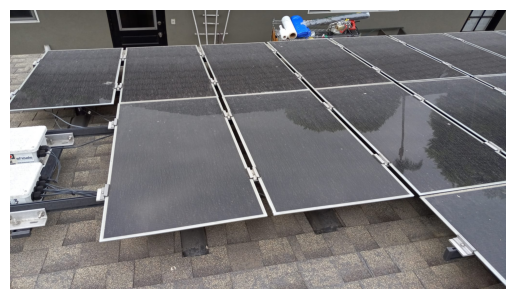

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/content/drive/My Drive/solar_panel/Dusty-20250728T133613Z-1-001/Dusty/Dust (90).jpg"
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# Create central folder
!mkdir /content/solar_data

# Copy each class folder from Google Drive to Colab
!cp -r "/content/drive/My Drive/solar_panel/Clean-20250728T133357Z-1-001/Clean" /content/solar_data/Clean
!cp -r "/content/drive/My Drive/solar_panel/Dusty-20250728T133613Z-1-001/Dusty" /content/solar_data/Dusty
!cp -r "/content/drive/My Drive/solar_panel/Bird-drop-20250728T133446Z-1-001/Bird-drop" /content/solar_data/Bird-drop
!cp -r "/content/drive/My Drive/solar_panel/Snow-Covered-20250728T133227Z-1-001/Snow-Covered" /content/solar_data/Snow-Covered
!cp -r "/content/drive/My Drive/solar_panel/Physical-Damage-20250728T133326Z-1-001/Physical-Damage" /content/solar_data/Physical-Damage
!cp -r "/content/drive/My Drive/solar_panel/Electrical-damage-20250728T133343Z-1-001/Electrical-damage" /content/solar_data/Electrical-damage


In [ ]:
!ls /content/solar_data

Bird-drop  Clean  Dusty  Electrical-damage  Physical-Damage  Snow-Covered


In [ ]:
# Step 1: Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Step 2: Prepare Data
data_dir = "/content/solar_data"

img_height, img_width = 150, 150
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 711 images belonging to 6 classes.
Found 174 images belonging to 6 classes.


In [ ]:
#Step 3: Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637,126 (40.58 MB)

 Trainable params: 10,637,126 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Train the Model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.1841 - loss: 2.8870 - val_accuracy: 0.2241 - val_loss: 1.7258
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.2918 - loss: 1.6680 - val_accuracy: 0.3793 - val_loss: 1.5596
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.3992 - loss: 1.5121 - val_accuracy: 0.5057 - val_loss: 1.2725
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5827 - loss: 1.1475 - val_accuracy: 0.6092 - val_loss: 1.1245
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.6831 - loss: 0.9205 - val_accuracy: 0.6092 - val_loss: 1.0418
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7707 - loss: 0.7193 - val_accuracy: 0.6897 - val_loss: 0.9037
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8571 - loss: 0.4738 - val_accuracy: 0.6207 - val_loss: 0.9677
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9131 - loss: 0.3520 - val_accuracy: 0.6379 - val_loss:

In [ ]:
##Step 5: Evaluate the Model
val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=list(val_gen.class_indices.keys())))


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step
Classification Report:
                    precision    recall  f1-score   support

        Bird-drop       0.62      0.61      0.62        41
            Clean       0.61      0.74      0.67        38
            Dusty       0.70      0.61      0.65        38
Electrical-damage       0.89      0.85      0.87        20
  Physical-Damage       0.64      0.54      0.58        13
     Snow-Covered       0.76      0.79      0.78        24

         accuracy                           0.68       174
        macro avg       0.70      0.69      0.69       174
     weighted avg       0.69      0.68      0.68       174



In [ ]:
#Step 6: Save the Model (Optional)
model.save("solar_defect_cnn_model.h5")


In [ ]:
##pkg
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


In [ ]:
#Load the Trained Model
model = load_model("solar_defect_cnn_model.h5")


In [ ]:
# Step 3: Set Class Labels
# Replace with your own class labels if needed
class_labels = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


In [ ]:
#Step 4: Load and Predict a Single Image
img_path = "/content/solar_data/Dusty/Dust (94).jpg"  # ✅ Use full path to test image

img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
predictions = model.predict(img_array)
predicted_class = class_labels[np.argmax(predictions)]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted Class: Dusty


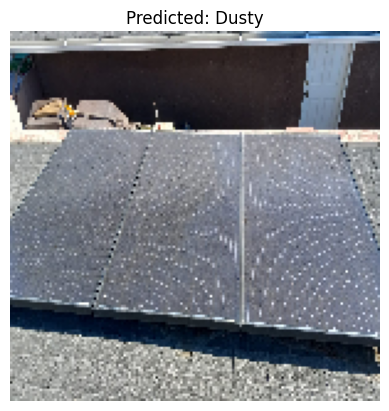

In [ ]:
# Display Image with Prediction
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
model.save("solar_defect_cnn_model.h5")
files.download("solar_defect_cnn_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
model.save("solar_defect_cnn_model.h5")
files.download("solar_defect_cnn_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
yolo
object dection

In [11]:
# Create the main folder in Colab
!mkdir -p /content/solar_data

# Copy all 6 image folders into /content/solar_data
!cp -r "/content/drive/My Drive/solar_panel/Clean-20250728T133357Z-1-001/Clean" /content/solar_data/Clean
!cp -r "/content/drive/My Drive/solar_panel/Dusty-20250728T133613Z-1-001/Dusty" /content/solar_data/Dusty
!cp -r "/content/drive/My Drive/solar_panel/Bird-drop-20250728T133446Z-1-001/Bird-drop" /content/solar_data/Bird-drop
!cp -r "/content/drive/My Drive/solar_panel/Snow-Covered-20250728T133227Z-1-001/Snow-Covered" /content/solar_data/Snow-Covered
!cp -r "/content/drive/My Drive/solar_panel/Physical-Damage-20250728T133326Z-1-001/Physical-Damage" /content/solar_data/Physical-Damage
!cp -r "/content/drive/My Drive/solar_panel/Electrical-damage-20250728T133343Z-1-001/Electrical-damage" /content/solar_data/Electrical-damage


In [12]:
import os
os.listdir('/content/solar_data')


['Bird-drop',
 'Physical-Damage',
 'Clean',
 'Electrical-damage',
 'Snow-Covered',
 'Dusty']

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/solar_data"  # Or wherever your dataset is

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1418 images belonging to 6 classes.
Found 352 images belonging to 6 classes.


In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_gen, validation_data=val_gen, epochs=10)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 348s 8s/step - accuracy: 0.2292 - loss: 1.9357 - val_accuracy: 0.3636 - val_loss: 1.5597
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 310s 7s/step - accuracy: 0.2909 - loss: 1.6605 - val_accuracy: 0.4830 - val_loss: 1.4575
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 328s 7s/step - accuracy: 0.3624 - loss: 1.5837 - val_accuracy: 0.4517 - val_loss: 1.3943
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 305s 7s/step - accuracy: 0.3763 - loss: 1.5237 - val_accuracy: 0.4091 - val_loss: 1.3780
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 327s 7s/step - accuracy: 0.4002 - loss: 1.4665 - val_accuracy: 0.3807 - val_loss: 1.4758
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 305s 7s/step - accuracy: 0.4036 - loss: 1.5015 - val_accuracy: 0.4545 - val_loss: 1.3541
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 304s 7s/step - accuracy: 0.4548 - loss: 1.4150 - val_accuracy: 0.5312 - val_loss: 1.2904
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 302s 7s/step - accuracy: 0.4543 - loss: 1.3899 - val_accuracy: 0.5426 - v

In [15]:
print(type(model))

<class 'keras.src.models.functional.Functional'>


In [16]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {val_acc:.2f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.4909 - loss: 1.2581
Validation Accuracy: 0.49


In [17]:
model.save("solar_resnet_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


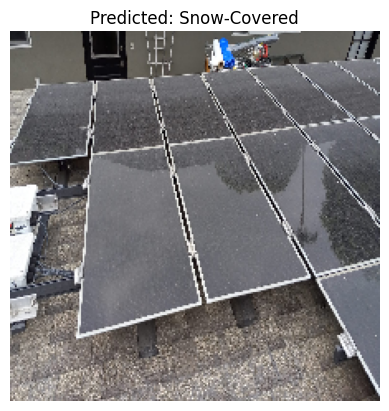

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Sample test image
img_path = "/content/solar_data/Dusty/Dust (90).jpg"

# Preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
pred = model.predict(img_array)
class_labels = list(train_gen.class_indices.keys())
predicted_label = class_labels[np.argmax(pred)]

# Display result
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis("off")
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Reset the validation generator
val_gen.reset()

# Get predictions (softmax probabilities)
preds = model.predict(val_gen, verbose=1)

# Convert probabilities to class labels
y_pred = np.argmax(preds, axis=1)

# True class labels
y_true = val_gen.classes

# Class label names
class_labels = list(val_gen.class_indices.keys())

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("📊 Classification Report:\n")
print(report)


11/11 ━━━━━━━━━━━━━━━━━━━━ 62s 5s/step
📊 Classification Report:

                   precision    recall  f1-score   support

        Bird-drop       0.25      0.22      0.24        82
            Clean       0.20      0.14      0.17        77
            Dusty       0.33      0.21      0.26        76
Electrical-damage       0.23      0.37      0.28        41
  Physical-Damage       0.00      0.00      0.00        27
     Snow-Covered       0.15      0.35      0.21        49

         accuracy                           0.22       352
        macro avg       0.19      0.21      0.19       352
     weighted avg       0.22      0.22      0.21       352



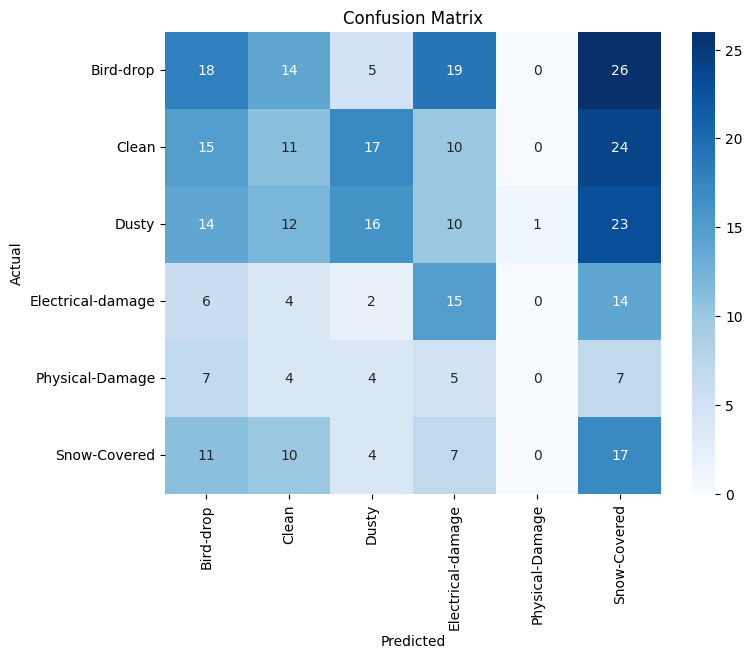

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from google.colab import files
files.download("solar_resnet_model.h5")